# **Seattle Airbnb Data Analysis**

This is the project of Udacity's data science nanodegree program.
This project is required to analyse data with CRISP-DM.

**CRISP-DM**
(Cross-Industry Standard Process for Data Mining)
Business Understanding
Data Understanding
Data Preparation
Modeling
Evaluation
Deployment

**Business Model**

Airbnb is a community-based online platform for listing and renting local homes. It connects hosts and customers and facilitates the process of renting without owning any rooms itself. Moreover it cultivates a sharing-economy by allowing property owners to rent out private flats.

Airbnb makes money by charging a service fee — a percentage of the total — to both the people who rent out their space (hosts) and those who stay there (customers). Some recent large expenses have been invested into Airbnb's once-profitable bottom line including safety, tech, marketing, and acquisitions.

![](https://businessmodelanalyst.com/wp-content/uploads/2020/06/how-airbnb-business-model-works-1024x576.jpg)

reference: https://businessmodelanalyst.com/airbnb-business-model/

**Key Questions** 

1. The implication of different months on the room availaility and average price?
Room availability and average price are two most essential factors regarding to the booking. It firstly determines the income for the hosts. Secondly, it is impportant for the benefits for the Airbnb itself, because benefits of a company is depedant on the unit income and amount (availability).


2. What is the correlated factor which could potentially affect the price and cleaning fee?
Price and clearning fee are essential factors that customers are looking when making the booking. It determines the willingness of the booking. It is also the most important benefit of customers, hosts and Airbnb. Therefore, the research of this correlation can help to make a balance between the benefits of all sides.

3. What is the correlation of price and reviews? What is the factors which could affect reviews?
Customers' feedback is one the most important factors of a consistant development of a business. Price is one of the most important factors along with others which could determine customers' review. Different price levels certainly incur different levels of expectations which affects the review's given.

**The process of analysis workflow**:
1. Import the 2017 Seattle Airbnb Data Analysis Dataset
2. Understand the variables of the dataset
3. Conclusions based on the CRISP-DM

# 1. Import the 2017 Seattle Airbnb Data Analysis Dataset

In [1]:
# Load all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Update style for all plots
plt.style.use('fivethirtyeight')

1. Import the 2017 Seattle Airbnb Data Analysis Dataset

In [2]:
# Import the datasets
listings_df = pd.read_csv('/kaggle/input/seattle/listings.csv')
calendar_df = pd.read_csv('/kaggle/input/seattle/calendar.csv')
reviews_df = pd.read_csv('/kaggle/input/seattle/reviews.csv')

# 2. Understand the variables of the dataset

In [3]:
# calendar dataset
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [4]:
# review dataset
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [5]:
listings_df.sample(4)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
2247,1457330,https://www.airbnb.com/rooms/1457330,20160104002432,2016-01-04,Family Home for Urban Travelers,Located in Seattle's sweet and trendy neighbor...,Open concept home with two floors of comfortab...,Located in Seattle's sweet and trendy neighbor...,none,Columbia City is a very sweet little neighborh...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.22
2910,7228435,https://www.airbnb.com/rooms/7228435,20160104002432,2016-01-04,Cite Jardin - An Urban Retreat,Capitol Hill Townhome with Perfect Location - ...,NaN,Capitol Hill Townhome with Perfect Location - ...,none,Pike/Pine and Capitol Hill. Your gonna love it.,...,NaN,f,NaN,WASHINGTON,f,strict,f,f,1,NaN
832,6670332,https://www.airbnb.com/rooms/6670332,20160104002432,2016-01-04,Peaceful home in S. Capitol Hill,This cozy guesthouse is close to everything an...,"Enjoy the full kitchen, private deck, living r...",This cozy guesthouse is close to everything an...,none,Across the street from the beautiful Immaculat...,...,9.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.38
1948,6363765,https://www.airbnb.com/rooms/6363765,20160104002432,2016-01-04,Seattle House - Location & Privacy,Charming 2-bed home in great neighborhood. Lo...,Cozy one story home located in the heart of Be...,Charming 2-bed home in great neighborhood. Lo...,none,Nearby Maplewood Park - includes walking path ...,...,9.0,f,NaN,WASHINGTON,t,strict,f,f,8,2.79


In [6]:
calendar_df.sample(4)

,listing_id,date,available,price
1082206,7275027,2016-12-15,t,$89.00
481654,1084084,2016-08-10,t,$454.00
1042315,5633607,2016-08-31,t,$119.00
561740,8016646,2016-01-09,f,NaN


In [7]:
reviews_df.sample(4)

,listing_id,id,date,reviewer_id,reviewer_name,comments
2249,5304739,38518511,2015-07-16,35302744,Chelsea,Everything was great & we had everything we ne...
8452,1279660,52865207,2015-11-02,4119988,Bill,The place was great and Grace was a super nice...
1069,1742425,10926587,2014-03-13,11636305,Michael,Christine's private little house is in one of ...
54280,882274,30169998,2015-04-18,11054550,Ashley,This was my second time staying at Nick's plac...


**Data Wrangling when necessary**

In [8]:
# Fill missing price with zero
calendar_df['price'].fillna('$0', inplace=True)
# Remove commas in price
calendar_df['price'] = calendar_df['price'].apply(lambda x:''.join(x.split(',')))
# Convert price to numeric data
calendar_df['price'] = calendar_df['price'].apply(lambda x:float(x.split('$')[1]))
calendar_df.sample(4)

,listing_id,date,available,price
110601,6915487,2016-01-10,f,0.0
1245963,5683646,2016-08-09,t,95.0
69707,9202380,2016-12-26,t,115.0
684174,8342968,2016-06-16,t,65.0


In [9]:
# Convert available to numeric data
calendar_df['available'] = calendar_df['available'].apply(lambda x:1 if x=='t' else 0)
# Split month into a separate column
calendar_df['month'] = calendar_df['date'].apply(lambda x: x.split('-')[1])
calendar_df.sample(4)

,listing_id,date,available,price,month
1313582,3041619,2016-11-11,0,0.0,11
420232,48319,2016-04-30,1,220.0,04
91667,4250367,2016-02-25,1,600.0,02
845801,2686659,2016-04-09,1,95.0,04


In [10]:
# check if the number of listings was the same every day
calendar_df.groupby(['listing_id']).count()['date'].unique()

array([365])

In [11]:
# Groupby by month sum
calendar_df_month_sum = calendar_df.groupby(['month']).sum()
calendar_df_month_sum.drop(['listing_id'],axis=1,inplace=True)
calendar_df_month_sum.reset_index(inplace=True)
calendar_df_month_sum

,month,available,price
0,01,64937,7981548.0
1,02,73321,9113355.0
2,03,83938,10798161.0
3,04,76037,10272371.0
4,05,79971,11159008.0
5,06,77244,11391415.0
6,07,74222,11288732.0
7,08,76347,11502179.0
8,09,77246,11065949.0
9,10,82438,11296639.0


**Plot a line graph of "Availability vs. Month**

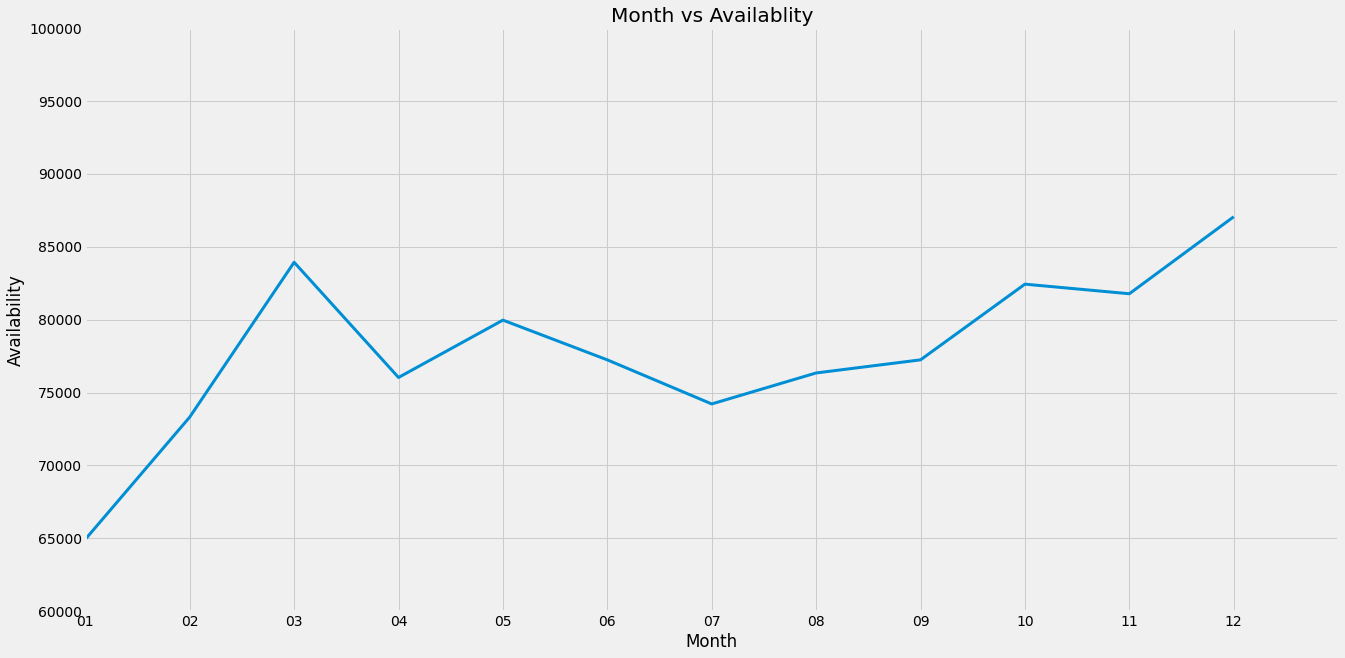

In [12]:
plt.figure(figsize=(20, 10))
x = calendar_df_month_sum['month']
y = calendar_df_month_sum['available']
plt.plot(x,y,linewidth=3.0)
plt.xlabel('Month')
plt.ylabel('Availability')
plt.title('Month vs Availablity')
plt.axis([0, 12, 60000, 100000])
plt.grid(True)
plt.show()

In [13]:
# Groupby by month average
calendar_df_month_sum['average price'] = calendar_df_month_sum['price']/calendar_df_month_sum['available']
calendar_df_month_sum

,month,available,price,average price
0,01,64937,7981548.0,122.912176
1,02,73321,9113355.0,124.293927
2,03,83938,10798161.0,128.644488
3,04,76037,10272371.0,135.097005
4,05,79971,11159008.0,139.538183
5,06,77244,11391415.0,147.473137
6,07,74222,11288732.0,152.094150
7,08,76347,11502179.0,150.656594
8,09,77246,11065949.0,143.255949
9,10,82438,11296639.0,137.031939


**Plot a line graph of "Average Price vs. Month**

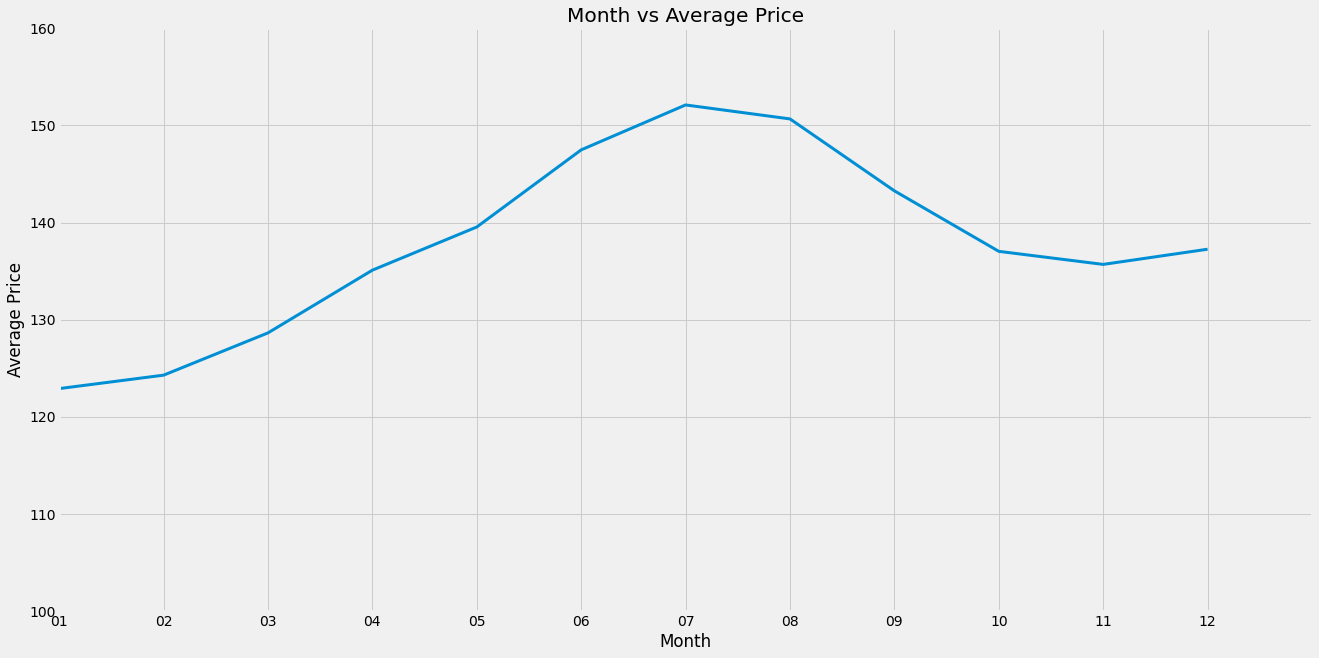

In [14]:
plt.figure(figsize=(20, 10))
x = calendar_df_month_sum['month']
y = calendar_df_month_sum['average price']
plt.plot(x,y,linewidth=3.0)
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Month vs Average Price')
plt.axis([0, 12, 100, 160])
plt.grid(True)
plt.show()

In [15]:
# listings dataset
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [16]:
listings_df.sample(4)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1082,9866984,https://www.airbnb.com/rooms/9866984,20160104002432,2016-01-04,Downtown Seattle Apartment 1BR Unit,"In the heart of downtown Seattle, just steps f...",> Downtown Seattle Apartment > Steps away from...,"In the heart of downtown Seattle, just steps f...",none,It's downtown! Need I say more?,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,1.00
1433,6490091,https://www.airbnb.com/rooms/6490091,20160104002432,2016-01-04,Master Bedroom - Private bathroom,Luxurious single master bedroom in the heart o...,NaN,Luxurious single master bedroom in the heart o...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,flexible,f,f,1,0.14
3609,10318171,https://www.airbnb.com/rooms/10318171,20160104002432,2016-01-04,Cozy basement room with shared bath,"Includes full size bed, a coffee maker, desk a...",NaN,"Includes full size bed, a coffee maker, desk a...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,3,NaN
3083,25002,https://www.airbnb.com/rooms/25002,20160104002432,2016-01-04,"Beautiful, Quiet, Friendly Ballard",NaN,"This large, newly renovated apartment has lots...","This large, newly renovated apartment has lots...",none,NaN,...,10.0,f,NaN,WASHINGTON,f,flexible,f,f,1,5.82


**Data Wrangling when necessary**

In [17]:
# find missing data
listings_df_miss = pd.DataFrame((listings_df.isnull().sum())*100/len(listings_df), columns=['% Missing Values'])
listings_df_miss[listings_df_miss['% Missing Values']>0]

,% Missing Values
summary,4.635935
space,14.903091
neighborhood_overview,27.029859
notes,42.063908
transit,24.463070
thumbnail_url,8.381351
medium_url,8.381351
xl_picture_url,8.381351
host_name,0.052383
host_since,0.052383


As data wrangling, data as missing values for security_deposit, cleaning_fee, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location and review_scores_value and reviews_per_month as zero will be valued as zero



In [18]:
# create missing cols list
missing_cols = ['security_deposit','cleaning_fee','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']
# check datatype of missing cols
listings_df[missing_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   security_deposit             1866 non-null   object 
 1   cleaning_fee                 2788 non-null   object 
 2   review_scores_rating         3171 non-null   float64
 3   review_scores_accuracy       3160 non-null   float64
 4   review_scores_cleanliness    3165 non-null   float64
 5   review_scores_checkin        3160 non-null   float64
 6   review_scores_communication  3167 non-null   float64
 7   review_scores_location       3163 non-null   float64
 8   review_scores_value          3162 non-null   float64
 9   reviews_per_month            3191 non-null   float64
dtypes: float64(8), object(2)
memory usage: 298.4+ KB


In [19]:
# fill '$0' to security deposit and cleaning fee
listings_df['security_deposit'].fillna('$0',inplace=True)
listings_df['cleaning_fee'].fillna('$0',inplace=True)
# remove commas/remove $ / convert to float - method 1
listings_df['security_deposit'] = listings_df['security_deposit'].str.replace(',','')
listings_df['security_deposit'] = listings_df['security_deposit'].str.replace('$','')
listings_df['security_deposit'] = listings_df['security_deposit'].astype('float')
# remove commas/remove $ / convert to float - method 2
listings_df['cleaning_fee'] = listings_df['cleaning_fee'].apply(lambda x: ''.join(x.split(',')))
listings_df['cleaning_fee'] = listings_df['cleaning_fee'].apply(lambda x: float(x.split('$')[1]))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [20]:
# fill 0 to other missing cols
for col in missing_cols:
    listings_df[col].fillna(0,inplace=True)
    
# print result
listings_df[missing_cols].sample(5)

,security_deposit,cleaning_fee,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
312,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1803,0.0,10.0,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2.45
3433,0.0,10.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.79
2075,100.0,40.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.04
3629,0.0,0.0,85.0,8.0,8.0,9.0,9.0,9.0,8.0,1.20


In [21]:
# convert amenities to numerical data
listings_df['amenities'] = listings_df['amenities'].apply(lambda x: x[1:-1].split(','))
listings_df['TV'] = 0
listings_df['Internet'] = 0
listings_df['Kitchen'] = 0
listings_df['Free_parking'] = 0
listings_df['Washer_dryer'] = 0
listings_df['Air Conditioning'] = 0
listings_df['Smoke_detector'] = 0
listings_df.sample(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,TV,Internet,Kitchen,Free_parking,Washer_dryer,Air Conditioning,Smoke_detector
99,5549211,https://www.airbnb.com/rooms/5549211,20160104002432,2016-01-04,Plum Apartment,We welcome you to this modern home in the hear...,"You'll find a well appointed kitchen, dining r...",We welcome you to this modern home in the hear...,none,Ballard is a fabulous walkable neighborhood wi...,...,f,1,4.05,0,0,0,0,0,0,0
303,6915487,https://www.airbnb.com/rooms/6915487,20160104002432,2016-01-04,Upper House near UW and Greenlake,Location and sparse elegance makes this a grea...,"Spacious, airy, bright home with beautiful flo...",Location and sparse elegance makes this a grea...,none,Woodlawn is 3 blocks away from Seattle's treas...,...,f,2,0.25,0,0,0,0,0,0,0


In [22]:
for i in range(len(listings_df)):
    if 'TV' in listings_df.loc[i,'amenities']:
        listings_df.loc[i,'TV'] = 1
    if 'Internet' in listings_df.loc[i,'amenities']:
        listings_df.loc[i,'Internet'] = 1
    if 'Kitchen' in listings_df.loc[i,'amenities']:
        listings_df.loc[i,'Kitchen'] = 1 
    if '"Free Parking on Premises"' in listings_df.loc[i,'amenities']:
        listings_df.loc[i,'Free_parking'] = 1
    if 'Washer' in listings_df.loc[i,'amenities']:
        listings_df.loc[i,'Washer_dryer'] = 1
    if '"Air Conditioning"' in listings_df.loc[i,'amenities']:
        listings_df.loc[i,'Air Conditioning'] = 1
    if '"Smoke Detector"' in listings_df.loc[i,'amenities']:
        listings_df.loc[i,'Smoke_detector'] = 1
listings_df.sample(2)
  

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,TV,Internet,Kitchen,Free_parking,Washer_dryer,Air Conditioning,Smoke_detector
1147,8814555,https://www.airbnb.com/rooms/8814555,20160104002432,2016-01-04,Great Condo 3 blocks to SpaceNeedle,Our condo is a newer condo in the heart of dow...,NaN,Our condo is a newer condo in the heart of dow...,none,NaN,...,f,1,0.0,1,1,1,0,1,1,1
515,9921445,https://www.airbnb.com/rooms/9921445,20160104002432,2016-01-04,Two LakeView Balconies in GreenLake,Take a seat on one of two private balconies at...,Take a seat on one of two private balconies at...,Take a seat on one of two private balconies at...,none,"Downtown Seattle is great, but Green Lake has ...",...,f,8,0.0,1,1,1,1,1,0,1


In [23]:
# clean price, monthly price and weekly price formats
# fill missing values as 0
listings_df['price'].fillna('$0', inplace=True)
listings_df['monthly_price'].fillna('$0', inplace=True)
listings_df['weekly_price'].fillna('$0', inplace=True)
# remove commas from price
listings_df['price'] = listings_df['price'].apply(lambda x: ''.join(x.split(',')))
listings_df['monthly_price'] = listings_df['monthly_price'].apply(lambda x: ''.join(x.split(',')))
listings_df['weekly_price'] = listings_df['weekly_price'].apply(lambda x: ''.join(x.split(',')))
# convert to float
listings_df['price'] = listings_df['price'].apply(lambda x: float(x.split('$')[1]))
listings_df['monthly_price'] = listings_df['monthly_price'].apply(lambda x: float(x.split('$')[1]))
listings_df['weekly_price'] = listings_df['weekly_price'].apply(lambda x: float(x.split('$')[1]))
listings_df[['price','monthly_price','weekly_price']].sample(5)

,price,monthly_price,weekly_price
2327,60.0,1100.0,360.0
1854,125.0,0.0,800.0
1388,115.0,0.0,800.0
1265,197.0,0.0,0.0
346,175.0,2500.0,1000.0


**Plot the bar chart of the price correlation factors**

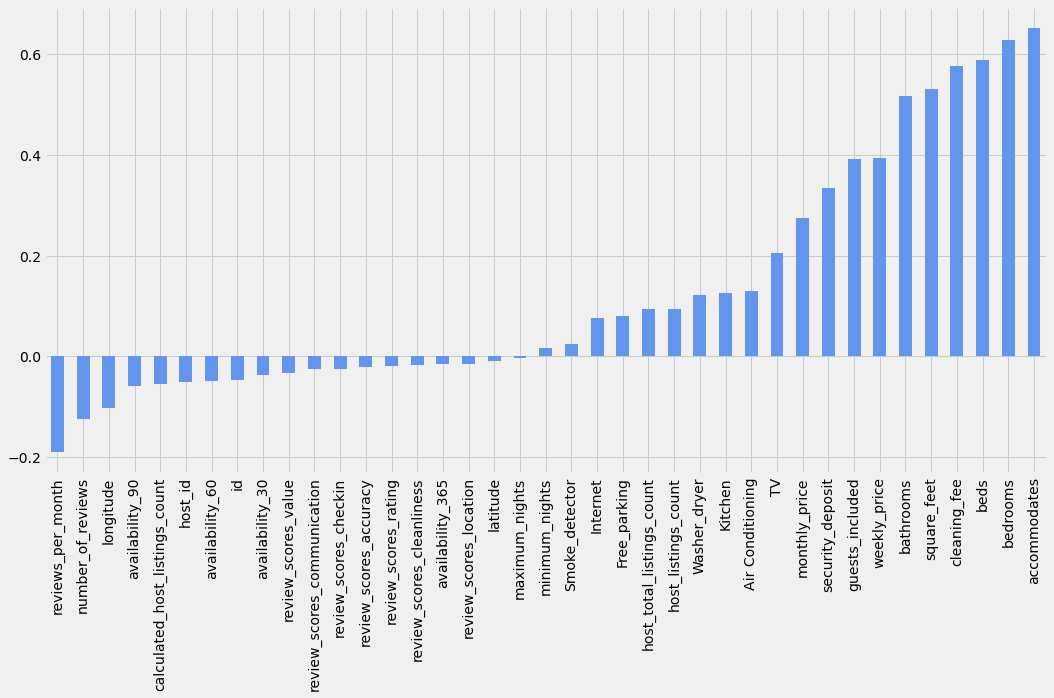

In [24]:
# find correlation to price
plt.figure(figsize=(16,8))
listings_df.corr()['price'].dropna().sort_values()[:-1].plot(kind='bar', color='cornflowerblue')
plt.show()

The above graph shows lots of factors which could affect the price. However, this graph includes too much irrelevant facots such as "weekly price, monthly price and host listings count", which reduced the readability of the graph. The next step is going to be the data selection to pick up the most relevant factors of the price.

In [25]:
import copy
listings_df_amenities = copy.deepcopy(listings_df)
listings_df_amenities.sample(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,TV,Internet,Kitchen,Free_parking,Washer_dryer,Air Conditioning,Smoke_detector
2861,4184211,https://www.airbnb.com/rooms/4184211,20160104002432,2016-01-04,Bdrm in Designer's Cap Hill Apt,Peaceful bedroom in light-filled 2nd floor apt...,"This spacious, light-filled apartment is on a ...",Peaceful bedroom in light-filled 2nd floor apt...,none,"Capitol Hill is a vibrant, urban neighborhood ...",...,f,1,1.59,0,0,1,0,1,0,1
15,8988178,https://www.airbnb.com/rooms/8988178,20160104002432,2016-01-04,"Lovely Queen Anne Cottage, 2 BR","This home is full of light, art and comfort. 5...","The Space This is a 1000 square foot, two bedr...","This home is full of light, art and comfort. 5...",none,Queen Anne is a charming and very safe neighbo...,...,f,1,0.73,1,1,1,1,1,0,1


**Update bar chart of the price correlation factors**

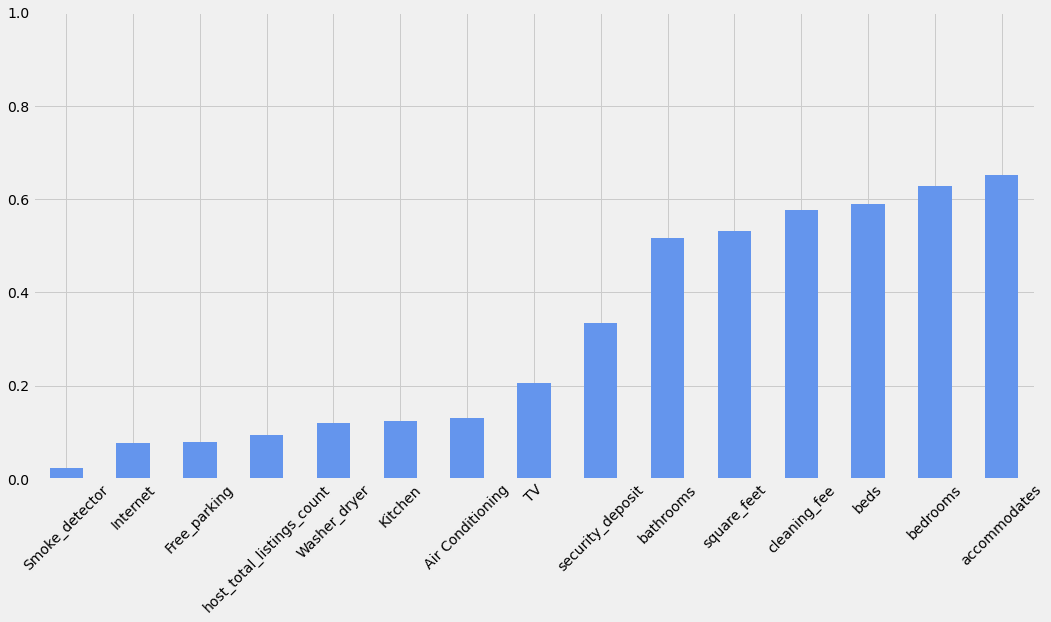

In [26]:
# find correlation to price
plt.figure(figsize=(16,8))
listings_df_amenities.drop(['id','reviews_per_month','host_id','longitude','latitude',\
                  'reviews_per_month','number_of_reviews','availability_90',\
                  'calculated_host_listings_count','availability_60',\
                  'availability_30','review_scores_value','review_scores_communication',\
                  'review_scores_checkin','review_scores_accuracy','review_scores_rating',\
                  'review_scores_cleanliness','availability_365','review_scores_location',\
                  'maximum_nights','minimum_nights','host_listings_count','monthly_price',\
                  'guests_included','weekly_price'],axis=1,inplace=True)
listings_df_amenities.corr()['price'].dropna().sort_values()[:-1].plot(kind='bar', color='cornflowerblue')
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.show()

It is obvious from the above bar chart that bigger the accomodates, higher the fee. It is a reasonalbe result. Number of bedrooms and beds also play important factor in the price setting.
Also in the correlation, interestingly we find that cleaning_fee has a higher correlation to price. The factors affecting the clearning fee is going to be analysed in the next step.

In [27]:
listings_df_amenities.corr()['cleaning_fee'].dropna().sort_values()

Smoke_detector               0.059321
Internet                     0.083274
Free_parking                 0.124628
Air Conditioning             0.162215
Washer_dryer                 0.165248
Kitchen                      0.167871
TV                           0.204379
host_total_listings_count    0.208788
security_deposit             0.426528
bathrooms                    0.449163
square_feet                  0.502380
bedrooms                     0.562421
price                        0.576423
beds                         0.585309
accommodates                 0.630588
cleaning_fee                 1.000000
Name: cleaning_fee, dtype: float64

In [28]:
import copy
listings_df_basics = copy.deepcopy(listings_df)
listings_df_basics.sample(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,TV,Internet,Kitchen,Free_parking,Washer_dryer,Air Conditioning,Smoke_detector
2780,5160893,https://www.airbnb.com/rooms/5160893,20160104002432,2016-01-04,"Charming, sunny & near everything!",Our three bedroom artist apartment welcomes yo...,***I will be out of the country from September...,Our three bedroom artist apartment welcomes yo...,none,Capitol Hill has everything. All the nightlife...,...,f,1,9.38,1,0,1,1,1,0,1
3554,6592178,https://www.airbnb.com/rooms/6592178,20160104002432,2016-01-04,Lofted urban retreat with roof deck,"Bright and airy, three-story open loft in Capi...","Spacious, architect-designed three-story loft ...","Bright and airy, three-story open loft in Capi...",none,The place is ideally located in the Capitol Hi...,...,f,1,0.59,1,1,1,0,1,0,1


Our theory proved right. Cleaning fee has a high correlation to size of the house. It also has a high correlation to security_deposit. We will remove these two columns as well from the dataset.

In [29]:
# remove cols
remove_cols = ['accommodates','bedrooms','beds','square_feet','bathrooms','guests_included',\
               'weekly_price','monthly_price','cleaning_fee','security_deposit',\
               'id','reviews_per_month','host_id','longitude','latitude',\
               'reviews_per_month','number_of_reviews','availability_90',\
                'calculated_host_listings_count','availability_60',\
                'availability_30','review_scores_value','review_scores_communication',\
                'review_scores_checkin','review_scores_accuracy','review_scores_rating',\
                'review_scores_cleanliness','availability_365','review_scores_location',\
                'maximum_nights','minimum_nights','host_listings_count','monthly_price',\
                'guests_included','host_total_listings_count']
listings_df_basics.drop(remove_cols,axis=1,inplace=True)

**Plot bar chart of price correlation factors**

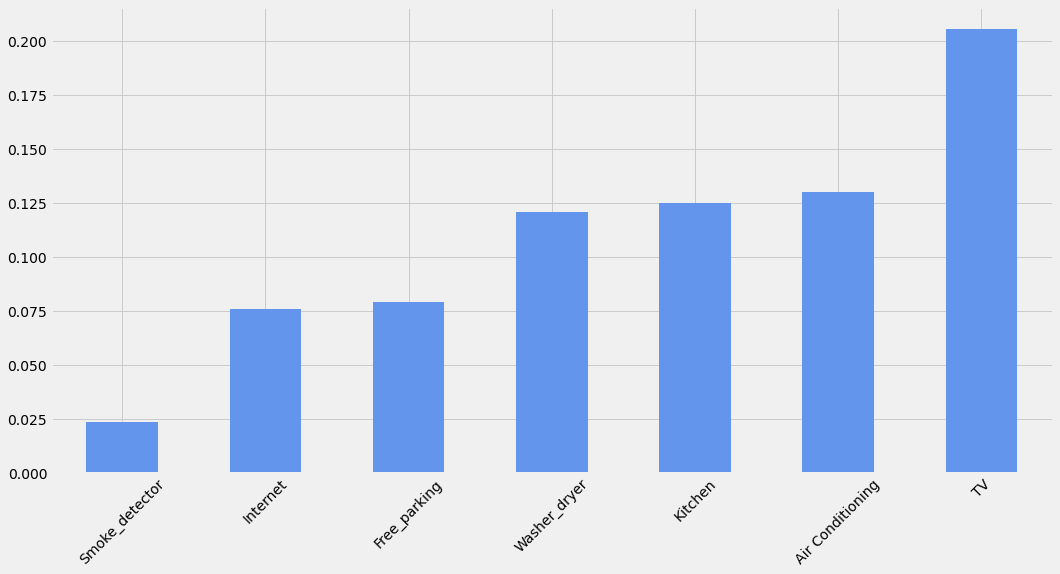

In [30]:
# Re-run the correlation to price with the remaining features
plt.figure(figsize=(16,8))
listings_df_basics.corr()['price'].dropna().sort_values()[:-1].plot(kind='bar', color='cornflowerblue')
plt.xticks(rotation=45)
plt.show()

Cleaning fee has a high correlation to the size of the property. It also has a high correlation to Ar conditioing and Kitchen. It is interesting that TV is the no.1 factor here. Part of the reason might be the TV is actually represengting the living room condition.

**Plot bar char of Review per month correlation factors**

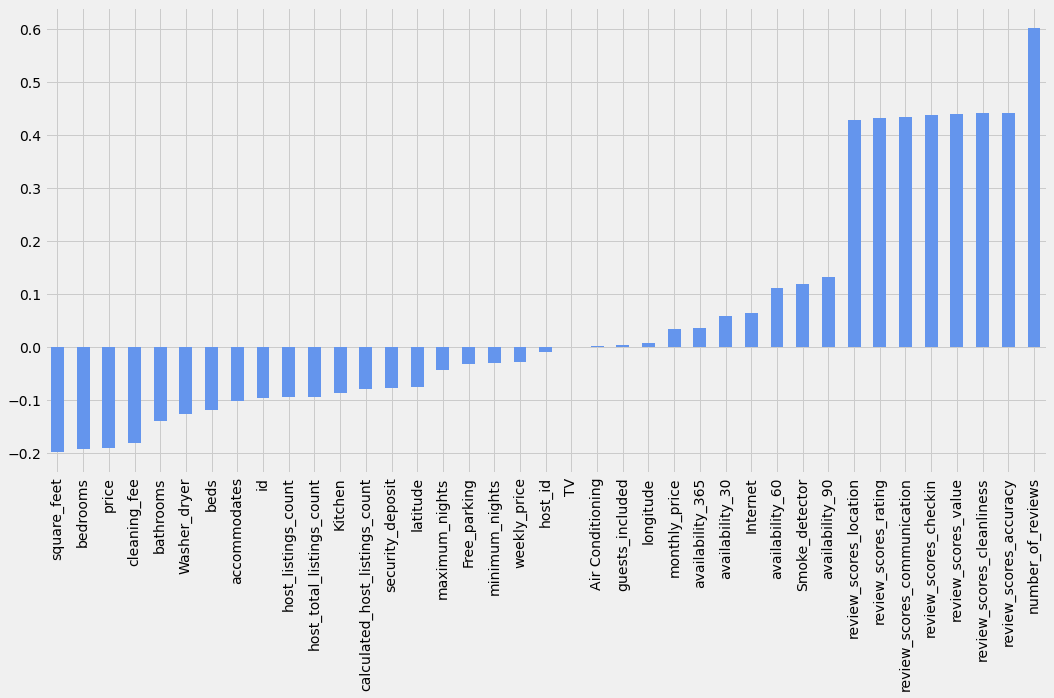

In [31]:
# Run the correlation to reviews per month with the remaining features
plt.figure(figsize=(16,8))
listings_df.corr()['reviews_per_month'].dropna().sort_values()[:-1].plot(kind='bar', color='cornflowerblue')
plt.show()

In [32]:
# groupby neighbourhood
listings_df_neigh = listings_df.groupby(['neighbourhood_cleansed']).mean()
listings_df_neigh.reset_index(inplace=True)
listings_df_neigh.sort_values(['price'],inplace=True,ascending=False)

In [33]:
listings_df_neigh.sample(2)

,neighbourhood_cleansed,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,license,calculated_host_listings_count,reviews_per_month,TV,Internet,Kitchen,Free_parking,Washer_dryer,Air Conditioning,Smoke_detector
2,Arbor Heights,5922527.0,2.016010e+13,13635023.8,1.000000,1.000000,47.510429,-122.381931,3.800000,1.3,...,NaN,1.000000,0.618000,0.6,0.400000,0.8,0.8,0.400000,0.000000,0.800000
77,Victory Heights,4794100.6,2.016010e+13,17552846.8,1.333333,1.333333,47.710634,-122.306537,2.266667,1.0,...,NaN,1.266667,1.449333,0.4,0.533333,0.8,0.8,0.666667,0.066667,0.666667


**Plot Bar char of Neighbourhood vs. Average Price**

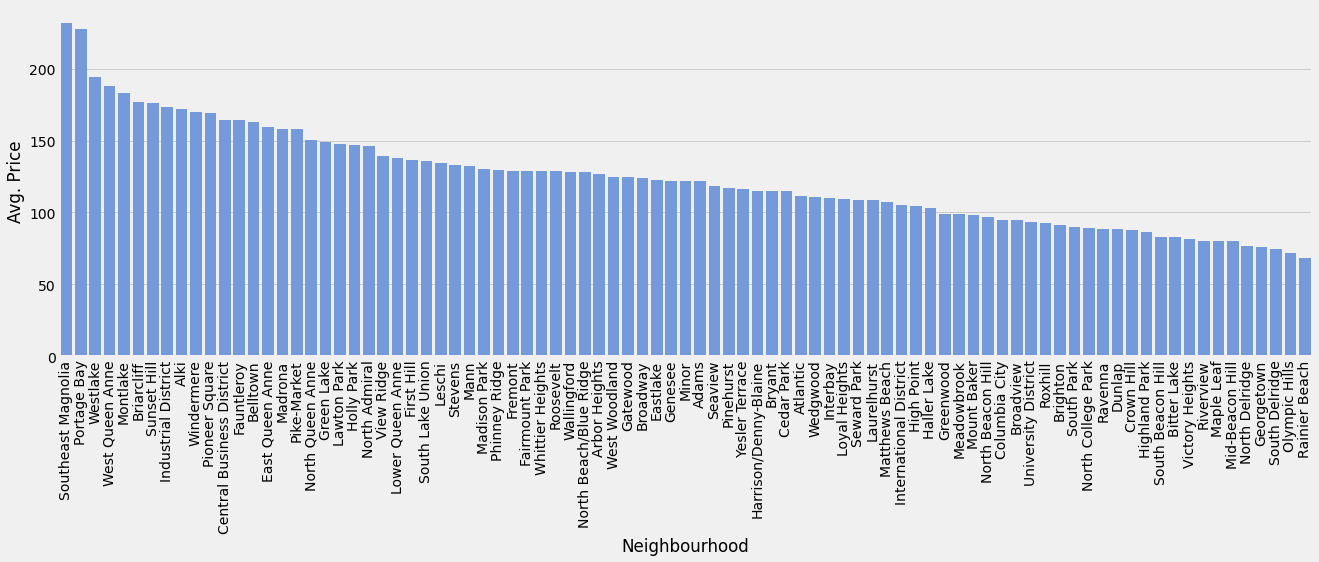

In [34]:
plt.figure(figsize=(20,6))
sb.barplot(x='neighbourhood_cleansed',y='price',data=listings_df_neigh,color='cornflowerblue')
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Avg. Price')
plt.show()

The most expensive properties are waterfront locations and cloes to the city centre of Seattle.

Let's look at the average price geographically

In [35]:
# append average price by neighborhood to the original listings dataframe
listings_df['neigh_avg_price'] = listings_df['neighbourhood_cleansed'].apply(lambda x: float(listings_df_neigh[listings_df_neigh['neighbourhood_cleansed']== x]['price'].values))

**Plot scatter plot of the Price vs. Location**

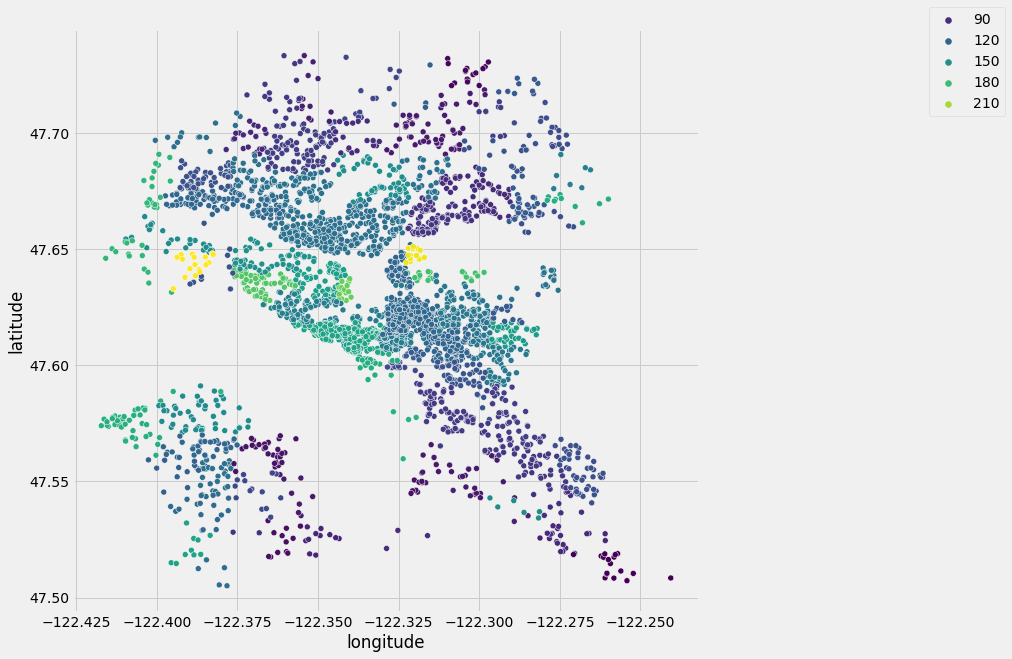

In [36]:
plt.figure(figsize=(10,10))
sb.scatterplot(x='longitude',y='latitude',data=listings_df,hue='neigh_avg_price',palette='viridis')
plt.legend(loc='upper right',bbox_to_anchor=(1.5, 1.05))
plt.show()

In [37]:
Stat = listings_df[["host_response_rate", "host_acceptance_rate", "host_is_superhost",
               "host_listings_count", "zipcode", "property_type","room_type", "accommodates", "bathrooms", "bedrooms", 
               "beds", "price", "number_of_reviews", "review_scores_rating", "cancellation_policy", 
               "reviews_per_month"]]
Stat.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month
0,96%,100%,f,3.0,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,85.0,207,95.0,moderate,4.07
1,98%,100%,t,6.0,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,150.0,43,96.0,strict,1.48
2,67%,100%,f,2.0,98119,House,Entire home/apt,11,4.5,5.0,7.0,975.0,20,97.0,strict,1.15
3,NaN,NaN,f,1.0,98119,Apartment,Entire home/apt,3,1.0,0.0,2.0,100.0,0,0.0,flexible,0.00
4,100%,NaN,f,2.0,98119,House,Entire home/apt,6,2.0,3.0,3.0,450.0,38,92.0,strict,0.89


In [38]:
# % of NaN values
(len(Stat)-Stat.count())/len(Stat)*100

host_response_rate      13.698271
host_acceptance_rate    20.246202
host_is_superhost        0.052383
host_listings_count      0.052383
zipcode                  0.183342
property_type            0.026192
room_type                0.000000
accommodates             0.000000
bathrooms                0.419068
bedrooms                 0.157150
beds                     0.026192
price                    0.000000
number_of_reviews        0.000000
review_scores_rating     0.000000
cancellation_policy      0.000000
reviews_per_month        0.000000
dtype: float64

In [39]:
# drop NaN rows
Stat2=Stat.dropna(axis=0)

In [40]:
# % of rows droppped
(len(Stat)-len(Stat2))/len(Stat)*100

21.346254583551598

In [41]:
pd.options.mode.chained_assignment = None  # default='warn'

Stat2['host_response_rate'] = Stat2['host_response_rate'].astype(str)
Stat2['host_acceptance_rate'] = Stat2['host_acceptance_rate'].astype(str)
Stat2['price'] = Stat2['price'].astype(str)

In [42]:
# clean data
pd.options.mode.chained_assignment = None  # default='warn'
Stat2['host_acceptance_rate'] = Stat2['host_acceptance_rate'].str.replace("%", "").astype("float")
Stat2['price'] = Stat2['price'].str.replace("[$, ]", "").astype("float")
Stat2['host_response_rate'] = Stat2['host_response_rate'].str.replace("%", "").astype("float")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [43]:
Stat2['superhost']=np.where(Stat2['host_is_superhost']=='t',1,0)
del Stat2['host_is_superhost']

In [44]:
# select non-numeric variables and create dummies
non_num_vars = Stat2.select_dtypes(include=['object']).columns
Stat2[non_num_vars].head()

,zipcode,property_type,room_type,cancellation_policy
0,98119,Apartment,Entire home/apt,moderate
1,98119,Apartment,Entire home/apt,strict
2,98119,House,Entire home/apt,strict
6,98119,House,Private room,moderate
7,98119,Cabin,Private room,strict


In [45]:
dummy_vars = pd.get_dummies(Stat2[non_num_vars])
dummy_vars.head()

,zipcode_98101,zipcode_98102,zipcode_98103,zipcode_98104,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,...,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [46]:
# drop non-numeric variables from Stat2 and add the dummies
Stat3=Stat2.drop(non_num_vars,axis=1)
Stat3 = pd.merge(Stat3,dummy_vars, left_index=True, right_index=True)
Stat3.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,...,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,96.0,100.0,3.0,4,1.0,1.0,1.0,85.0,207,95.0,...,0,0,0,0,1,0,0,0,1,0
1,98.0,100.0,6.0,4,1.0,1.0,1.0,150.0,43,96.0,...,0,0,0,0,1,0,0,0,0,1
2,67.0,100.0,2.0,11,4.5,5.0,7.0,975.0,20,97.0,...,0,0,0,0,1,0,0,0,0,1
6,100.0,100.0,1.0,2,1.0,1.0,1.0,80.0,58,99.0,...,0,0,0,0,0,1,0,0,1,0
7,100.0,100.0,5.0,2,1.0,1.0,1.0,60.0,173,97.0,...,0,0,0,0,0,1,0,0,0,1


**Plot scatter plot of Number of bedroom vs. Price**

Text(0.5, 1.0, 'No. of bedrooms vs price')

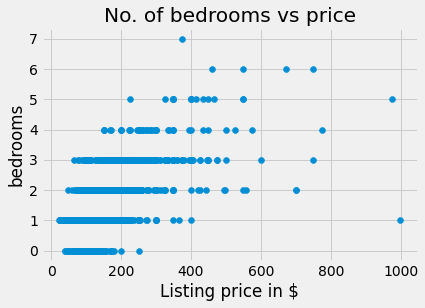

In [47]:
plt.scatter(Stat3['price'],Stat3['bedrooms'])
plt.ylabel('bedrooms')
plt.xlabel('Listing price in $')
plt.title('No. of bedrooms vs price')

**Plot scatter plot of Number of reviews vs. Price**

Text(0.5, 1.0, 'No. of reviews vs price')

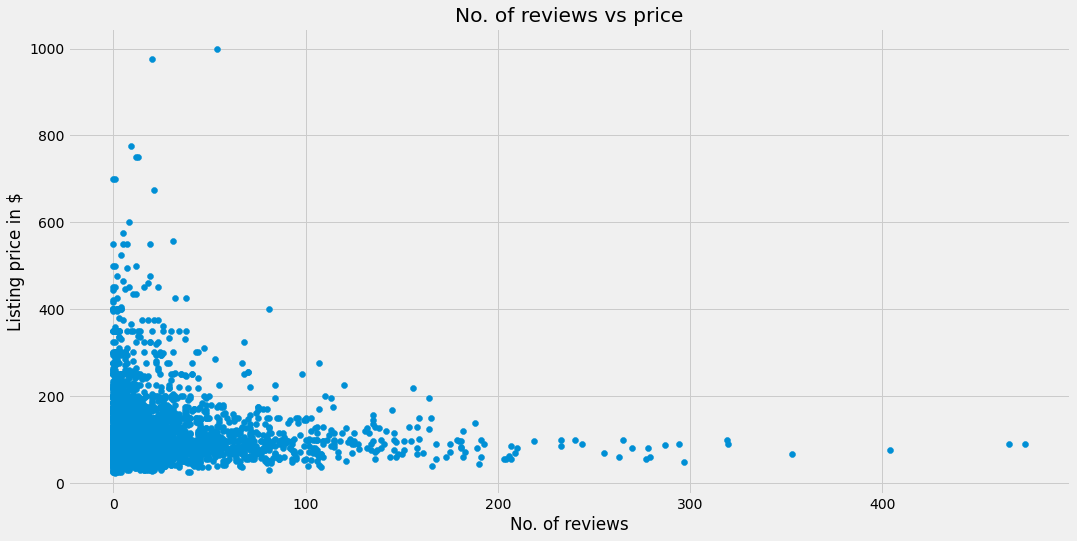

In [48]:
plt.figure(figsize=(16,8))
plt.scatter(Stat3['number_of_reviews'],Stat3['price'])
plt.ylabel('Listing price in $')
plt.xlabel('No. of reviews')
plt.title('No. of reviews vs price')
#plt.figure(figsize=(16,8))
#sb.scatterplot(x='number_of_reviews',y='price',data=listings_df)
#plt.show()

The main price range is below $200.

**Plot histogram of Number of bedroom vs. Price**

Text(0.5, 0, 'Listing price in $')

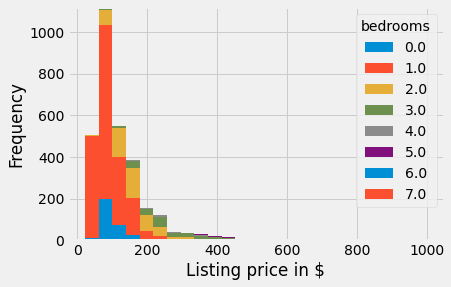

In [49]:
Stat3.pivot(columns = 'bedrooms',values = 'price').plot.hist(stacked = True,bins=25)
plt.xlabel('Listing price in $')

**Plot scatter plot of Accomodates vs. Price**

Text(0.5, 0, 'Listing price in $')

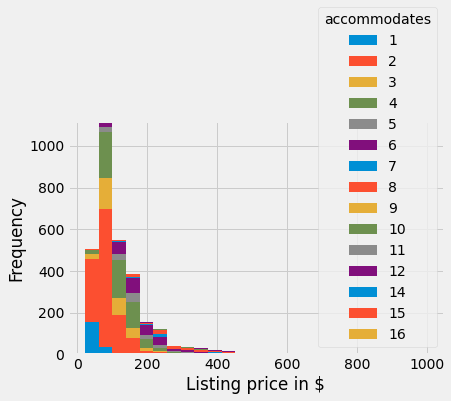

In [50]:
Stat3.pivot(columns = 'accommodates',values = 'price').plot.hist(stacked = True,bins=25)
plt.xlabel('Listing price in $')

# 3. Conclusions

The demand increases in the summer months of June, July and August and it drops afterwards. It is possibly because of the school holiday. There is a spike in demand again in January probably due christmas-New Year's holiday. The demand again drops after that. The average price of a rental is generally reflects the demand vs supply trend of the availability. When the availability in the market is low, the price is relatively higher. When there is sufficient supply, the price is lower.

The top six reasons of determing the price is "accomodates, number of bedroom, number of beds, clearning fee, size of the room, bathroom". These reasons provide a convincible reference for host setting the price to attract more booking, in the meanwhile maxmise the largest benefit. The clearning fee is mainly relies on the amenities supplies such as "TV, AC, Kitchen, Washer / Dryer, Interne".

The largest number of reviews are applied on the properties of low-middle range of price. It follows with the reality that low-middle price properties attract more customers than the high price ones. Most properties provide only 1 bedroom. The most expensive area like Southeast Magnolia, Portage Bay, Westlake in Seattle are all located near the water and close to the city centre.